# Crear una Red Neuronal

In [44]:
import numpy as np
from math import pi, cos, sin, tanh
import pandas as pd

from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split

import time
from abc import ABCMeta, abstractmethod

import matplotlib.pyplot as plt
from IPython.display import clear_output

## Creamos el Dataset

In [45]:
def generate_spiral_dataset(density=1, maxRadius=6.5, c=0):
	""" To generate spiral dataset
	It generates one spirals dataset with x and y coordinates
	This generator generates points, each with 96 * density + 1 data points
	(3 revolutions of 32 times the density plus one end point).
	Args:
		density (int)  : Density of the points
		maxRadius (float) : Maximum radius of the spiral
		c (int) : Class of this spiral
	Returns:
		array: Return spiral data and its class
	"""
	
	# Spirals data
	spirals_data = []
	
	# Spirals class
	spirals_class = []

	# Number of interior data points to generate
	points = 96 * density 

	# Generate points
	for i in range(0, points):
		# Angle is based on the iteration * PI/16, divided by point density
		angle = (i * pi) / (16 * density)

		# Radius is the maximum radius * the fraction of iterations left
		radius = maxRadius * ((104 * density) - i) / (104 * density)

		# Get x and y coordinates
		x = radius * cos(angle)
		y = radius * sin(angle)
		
		# Format: 8.5f
		x = float(format(x, '8.5f'))
		y = float(format(y, '8.5f'))

		spirals_data.append([x, y])
		spirals_class.append([c])

	return spirals_data, spirals_class

def generate_two_spirals_dataset(density=1, maxRadius=6.5):
	""" To generate two spirals dataset
	It generates two spirals dataset with x and y coordinates
	
	First spiral dataset will be generated with the function
	`generate_spiral_dataset`.
	Then, the coordinates will be flipped to get second
	spiral dataset
	Args:
		density (int)  : Density of the points
		maxRadius (float) : Maximum radius of the spiral
	Returns:
		array: Return spirals data and its class
	"""

	# Spirals data
	spirals_data = []
	
	# Spirals class
	spirals_class = []

	# First spirals data and class
	first_spiral_data, first_spiral_class = generate_spiral_dataset(density, maxRadius)

	# Construct complete two spirals dataset
	for fsd in first_spiral_data:
		# First spirals coordinate
		spirals_data.append(fsd)

		# Second spirals coordinate
		spirals_data.append([-fsd[0], -fsd[1]])

	# Construct complete two spirals classes
	for fsc in first_spiral_class:
		# First spirals class
		spirals_class.append(fsc)

		# Second spirals class
		spirals_class.append([1])

	return spirals_data, spirals_class	

In [46]:
# Documentacion del dataset
class Dataset:
    @staticmethod
    def circles(n_samples, factor, noise):
        X, Y = make_circles(n_samples=n_samples, factor=factor, noise=noise)
        # Change self.labels shape from (labels_count, ) to (labels_count, 1).
        #                                    Serie       to       Matrix
        Y = np.reshape(Y, (Y.shape[0], 1))
        return Dataset(X, Y)
    
    @staticmethod
    def spiral(density=1, max_radius=6.5):
        points, classes = generate_two_spirals_dataset(density, max_radius);
        return Dataset(np.array(points), np.array(classes))

    def __init__(self, X, Y): self.X, self.Y = X, Y

    def train_test(self, test_size, shuffle=True):
        return train_test_split(
            self.X, self.Y, test_size=test_size, shuffle=shuffle)

    def plot(self): DatasetPlotter.plot(self.X, self.Y)

In [47]:
class DatasetPlotter:
    @staticmethod
    def plot(X, Y):
        plt.scatter(X[Y[:, 0] == 0, 0], X[Y[:, 0] == 0, 1], c='skyblue')
        plt.scatter(X[Y[:, 0] == 1, 0], X[Y[:, 0] == 1, 1], c='salmon')
        plt.axis('equal')
        plt.grid()
        plt.show()

## Creamos dos variables diferentes

## $n$ es la cantidad de objetos que vamos a analizar

## $p$ es la cantidad de clasificaciones de los objetos

In [48]:
n = 1000
p = 2

## Aqui visualizamos como el datset forma los dos circulos, poniendoles ruido para aumentar la dificultad

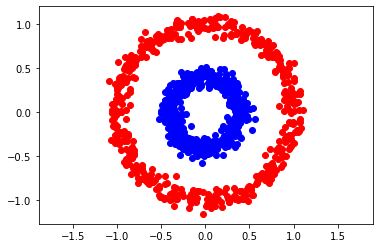

In [84]:
x,y = make_circles(n_samples=n, factor= 0.4, noise= 0.06)

y = y[:, np.newaxis]
y.shape
plt.scatter(x[y[:, 0]==0, 0 ], x[y[:, 0] == 0, 1], c = 'red')
plt.scatter(x[y[:, 0]==1, 0 ], x[y[:, 0] == 1, 1], c = 'blue')
plt.axis("equal")
plt.show()

## Clase de la capa de la Red
### 

In [50]:
#Clase de las Capas de la Red Neuronal
#n_conexiones = al numero de conexiones que va a tener la capa
# n_neuronas = el númweo de neuronas por capa
# activacion_func = la funcion de activación.
class neural_layer():
    def __init__(self,n_conexiones, n_neuronas, activacion_func):
        #pasa la funcion de activacion
        self.activacion_func = activacion_func
        #el parametro de bias, esto se inicializa de manera aleatoria (que nos da un valor entre 0 a 1)
        # queremos que el bias vaya de -1 a 1 y para eso multiplicamos *2 -1
        self.b = np.random.rand(1, n_neuronas) * 2 -1
        #Lo mismo para el parametro weight que son los pesos de las entradas a la neurona.
        #como el parametro w no es un vector como el bias sino que es una matriz, entonces 
        #en lugar de 1 va a ser el numero de conexiones.
        self.w = np.random.rand(n_conexiones, n_neuronas) * 2 - 1
        
        # esto no es más que una estructura de datos para la red neuronal


## Funciones de Activación
### Aqui declaramos las Funciones de Activación Sigmoide y ReLu

In [51]:
# Sigmoide
# siendo x el valor de entrada.
sigmoide = (lambda x:1 / (1+np.e ** -x), #Funcion sigmoide
            lambda x: x*(1-x)) #derivada de la funcion sigmoide

def derivada_relu(x):
  x[x<=0] = 0
  x[x>0] = 1
  return x

relu = (lambda x:  np.maximum(0,x),
        lambda x: derivada_relu(x))




# Arquitectura o Topologia de la Red Neuronal

In [52]:

# Podemos definir individualmente las capas
#l0 = neural_layer(p,4, sigmoide)
#l1 = neural_layer(4,8,sigmoide)
#... 
## Creamos la topologia de la Red que consta en 
# el numero de capas y la cantidad de neuronas que tendrá cada capa
topologia = [p,4,8,4,1]
def create_neural(topologia, activacion_func):
   
    neural_net = []
      # Creamos un ciclo for para recorrer en el objeto de layer, en nuestro 
      #objeto topologia, esto para crear la infrestructura de la Red Neuronal
    for l, layer in enumerate(topologia[:-1]):
           ## Aqui añadimos las capas a la Red, 
       neural_net.append(neural_layer(topologia[l],topologia[l+1],activacion_func))
    return neural_net


In [53]:
create_neural(topologia,sigmoide)
# Vemos que tiene 4 capas ocultas

# Entrenamiento de la Red Neuronal

In [ ]:
# Declaramos la Topologia de la Red
topologia = [p,4,8,4,1]
#Creamos la Red Neuronal
red_neuronal = create_neural(topologia,sigmoide)

#Funcion de  Error cuadratico medio
#siendo 
# Yp=La Y que nuestra red está prediciendo
# Yr = La Y Real la que está en nuestro DataSet
l2_cost = (lambda Yp, Yr,:np.mean((Yp-Yr)**2), # Error Cuadratico Medio
            lambda Yp, Yr: (Yp-Yr)) #Derivada del Error Cuadratico Medio

#Funcion de la Red Neuronal
def train(red_neuronal, x, y, l2_cost, lr = 0.5, train = True):
    # Forward pass
    # Aqui hacemos la suma ponderada de cada neurona de la red
    # y a esa suma ponderada se la damos como entrada a la 
    # funcion de activacion
    # y esto para cada capa de la red
    
    # declaramos el output de la operacion en la red
    out = [(None,x)]
    # Recorremos todas las capas de la red
    for l, layer in enumerate(red_neuronal):
        #Siendo 
        #z = La ultima capa de la red (out[-1][1]) haciendo producto matricial con la matriz de los pesos de la capa
        # y sumandole la matriz de los bias
        
        ## a = a la capa en l hacerle la función de activacion del resultado de z
        z = out[-1][1] @ red_neuronal[l].w + red_neuronal[l].b
        a = red_neuronal[l].activacion_func[0](z) 
        # con cada iteracion añadirle al vector out cada capa
        out.append((z,a))
   
    #si queremos que la red se entrene
    if train == True:
        # Aqui entrenamos la red haciendo uso 
        # del algoritmo de BackPropagation
        
        # Aqui hacemos uso de Backward pass 
        #aqui guardamos todas las deltas (derivadas parciales) en funcion del error
        # de la capa anterior
        deltas = []
        
        # Recorremos todas las capas de la red neuronal
        # pero lo hacemos desde la ultima capa hasta la primera
        for l in reversed(range(0, len(red_neuronal))):
            # obtenemos los valores de la suma ponderada y de la activacion de la respectiva capa
            z = out[l+1][0]
            a = out[l+1][1]
            #print(a.shape)
            # significa que estamos en la ultima capa
            if l == len(red_neuronal) - 1:
                # Calculamos el delta de la ultima capa
                # queremos que cada delta sea añadida al principio
                #para calcular la derivada de la ultima capa hacemos
                # La derivada de la funcion coste por la derivada de la funcion de activacion
                deltas.insert(0,l2_cost[1](a, y)* red_neuronal[l].activacion_func[1](a))
                #print(deltas)
            else:
                # Calculamos el delta de la capa respecto a la capa previa
                # Para calcular la delta en funcion de la delta anterior hacemos
                # la delta de la capa anterior haciendo producto matricial con la matriz de los pesos de la capa
                # y esto haciendo producto con la funcion de activacion
                deltas.insert(0,deltas[0]@ _w.T * red_neuronal[l].activacion_func[1](a))
            
            _w = red_neuronal[l].w

            # Hacemos uso del Decenso del Gradiente
            #Aqui optimizamos el coste en funcion del Bias
            red_neuronal[l].b = red_neuronal[l].b - np.mean(deltas[0], axis=0, keepdims = True) * lr
            # Aqui optimizamos el parametro w 
            red_neuronal[l].w = red_neuronal[l].w - out[l][1].T @ deltas[0]  * lr
    #Devolvemos el valor a predecir
    return out[-1][1]




#Llamamos a la función 
#train(red_neuronal,x ,y , l2_cost, 0.5)


# Implementación de la Red Neuronal 

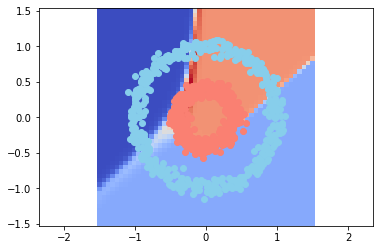

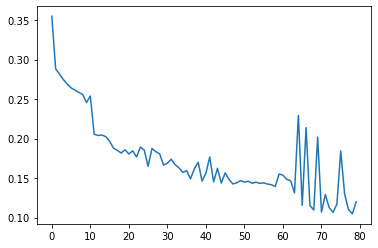

In [85]:
import time
from IPython.display import clear_output
topologia = [p,5,10,5,2]
red_neuronal = create_neural(topologia,sigmoide)
#Creamos la 
learning_rate=0.1
def implementacion(red_neuronal,x,y,learning_rate,l2_cost,iteraciones):
#Declaramos un vector de perdida
    loss = []

    for i in range(iteraciones):
        # Entrenamos a la red
        pY = train(red_neuronal,x,y, l2_cost, lr = learning_rate)
        #cada 25 iteraciones:
        if i % 25 == 0:
            #agregamos al vector de perdida 
            loss.append(l2_cost[0](pY,y))

            res = 50
            #Creamos una malla de puntos o plano de 50x50 para visualizar 
            _x0 = np.linspace(-1.5, 1.5, res)
            _x1 = np.linspace(-1.5, 1.5, res)

            _y =np.zeros((res, res))

            for i0,x0 in enumerate(_x0):
                for i1, x1  in enumerate(_x1):
                    #aqui llamamos a train pero que no se entrene, sino que
                    # haga predicciones
                    _y[i0,i1] = train( red_neuronal, np.array([[x0,x1]]), y, l2_cost, train=False)[0][0]
            ## Esto simplemente es visualizar las predicciones
            plt.pcolormesh(_x0,_x1,_y, cmap ="coolwarm")
            plt.axis('equal')

            plt.scatter(x[y[:, 0]== 0, 0], x[y[:,0]==0,1],c='skyblue')
            plt.scatter(x[y[:, 0]== 1, 0], x[y[:,0]==1,1],c='salmon')

            clear_output(wait=True)
            plt.show()
            plt.plot(range(len(loss)), loss)
            plt.show()
            time.sleep(0.5)

implementacion(red_neuronal,x,y,learning_rate=0.1,l2_cost=l2_cost,iteraciones=2000)

## Consideremenos otro caso:
### El de una Espiral

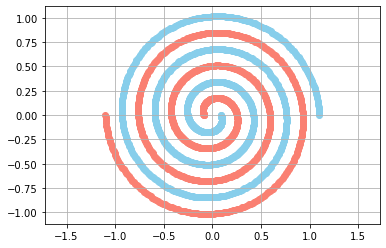

In [70]:
spiral_dataset = Dataset.spiral(density=10, max_radius=1.1)
spiral_dataset.plot()
x=spiral_dataset.X
y=spiral_dataset.Y

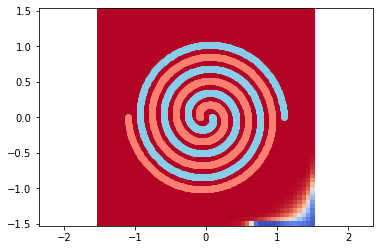

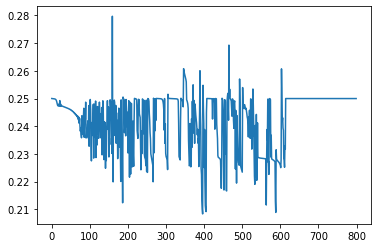

In [82]:
p=2
topologia = [p,30,20,10,5,2,1]
red_neuronal = create_neural(topologia,sigmoide)
implementacion(red_neuronal,x,y,learning_rate=0.02,l2_cost=l2_cost,iteraciones=20000)